In [2]:
!pip install pydicom

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import os
import pandas as pd
import numpy as np
import pydicom
import matplotlib.pyplot as plt
import cv2

In [5]:
cur_path = "/content/drive/MyDrive/Dataset/physionet.org/files/mimic-cxr/2.0.0/"
os.chdir(cur_path)
!pwd

/content/drive/MyDrive/Dataset/physionet.org/files/mimic-cxr/2.0.0


In [6]:
cxr_study_list = pd.read_csv(cur_path+'cxr-study-list.csv')
cxr_record_list = pd.read_csv(cur_path+'cxr-record-list.csv')

In [7]:
cxr_study_list

,subject_id,study_id,path
0,10000032,50414267,files/p10/p10000032/s50414267.txt
1,10000032,53189527,files/p10/p10000032/s53189527.txt
2,10000032,53911762,files/p10/p10000032/s53911762.txt
3,10000032,56699142,files/p10/p10000032/s56699142.txt
4,10000764,57375967,files/p10/p10000764/s57375967.txt
...,...,...,...
227830,19999442,58708861,files/p19/p19999442/s58708861.txt
227831,19999733,57132437,files/p19/p19999733/s57132437.txt
227832,19999987,55368167,files/p19/p19999987/s55368167.txt
227833,19999987,58621812,files/p19/p19999987/s58621812.txt


In [8]:
cxr_record_list

,subject_id,study_id,dicom_id,path
0,10000032,50414267,02aa804e-bde0afdd-112c0b34-7bc16630-4e384014,files/p10/p10000032/s50414267/02aa804e-bde0afd...
1,10000032,50414267,174413ec-4ec4c1f7-34ea26b7-c5f994f8-79ef1962,files/p10/p10000032/s50414267/174413ec-4ec4c1f...
2,10000032,53189527,2a2277a9-b0ded155-c0de8eb9-c124d10e-82c5caab,files/p10/p10000032/s53189527/2a2277a9-b0ded15...
3,10000032,53189527,e084de3b-be89b11e-20fe3f9f-9c8d8dfe-4cfd202c,files/p10/p10000032/s53189527/e084de3b-be89b11...
4,10000032,53911762,68b5c4b1-227d0485-9cc38c3f-7b84ab51-4b472714,files/p10/p10000032/s53911762/68b5c4b1-227d048...
...,...,...,...,...
377105,19999733,57132437,428e2c18-5721d8f3-35a05001-36f3d080-9053b83c,files/p19/p19999733/s57132437/428e2c18-5721d8f...
377106,19999733,57132437,58c403aa-35ff8bd9-73e39f54-8dc9cc5d-e0ec3fa9,files/p19/p19999733/s57132437/58c403aa-35ff8bd...
377107,19999987,55368167,58766883-376a15ce-3b323a28-6af950a0-16b793bd,files/p19/p19999987/s55368167/58766883-376a15c...
377108,19999987,58621812,7ba273af-3d290f8d-e28d0ab4-484b7a86-7fc12b08,files/p19/p19999987/s58621812/7ba273af-3d290f8...


In [9]:
merged = cxr_study_list.merge(cxr_record_list, how='inner', left_on=['subject_id','study_id'], right_on=['subject_id','study_id'])
merged

,subject_id,study_id,path_x,dicom_id,path_y
0,10000032,50414267,files/p10/p10000032/s50414267.txt,02aa804e-bde0afdd-112c0b34-7bc16630-4e384014,files/p10/p10000032/s50414267/02aa804e-bde0afd...
1,10000032,50414267,files/p10/p10000032/s50414267.txt,174413ec-4ec4c1f7-34ea26b7-c5f994f8-79ef1962,files/p10/p10000032/s50414267/174413ec-4ec4c1f...
2,10000032,53189527,files/p10/p10000032/s53189527.txt,2a2277a9-b0ded155-c0de8eb9-c124d10e-82c5caab,files/p10/p10000032/s53189527/2a2277a9-b0ded15...
3,10000032,53189527,files/p10/p10000032/s53189527.txt,e084de3b-be89b11e-20fe3f9f-9c8d8dfe-4cfd202c,files/p10/p10000032/s53189527/e084de3b-be89b11...
4,10000032,53911762,files/p10/p10000032/s53911762.txt,68b5c4b1-227d0485-9cc38c3f-7b84ab51-4b472714,files/p10/p10000032/s53911762/68b5c4b1-227d048...
...,...,...,...,...,...
377105,19999733,57132437,files/p19/p19999733/s57132437.txt,428e2c18-5721d8f3-35a05001-36f3d080-9053b83c,files/p19/p19999733/s57132437/428e2c18-5721d8f...
377106,19999733,57132437,files/p19/p19999733/s57132437.txt,58c403aa-35ff8bd9-73e39f54-8dc9cc5d-e0ec3fa9,files/p19/p19999733/s57132437/58c403aa-35ff8bd...
377107,19999987,55368167,files/p19/p19999987/s55368167.txt,58766883-376a15ce-3b323a28-6af950a0-16b793bd,files/p19/p19999987/s55368167/58766883-376a15c...
377108,19999987,58621812,files/p19/p19999987/s58621812.txt,7ba273af-3d290f8d-e28d0ab4-484b7a86-7fc12b08,files/p19/p19999987/s58621812/7ba273af-3d290f8...


In [10]:
def extract_finding_impression(origin_file):
    fp = open(origin_file)
    lines = fp.readlines() 
    mark = 0
    find_impression = []
    for line in lines:
        # print(line)
        if 'FINDINGS:' in line:
            mark = 1
            continue
        elif 'IMPRESSION:' in line:
            mark = 1
            continue
        elif ('EXAMINATION:' in line) or ('INDICATION:' in line) or ('TECHNIQUE:' in line) or ('COMPARISON:' in line):
            mark = 0
        else:
            if mark == 1:
                find_impression.append(line)

    fp.close()

    find_impression_str = ''
    for i in find_impression:
        i = i.replace('\n', '')
        find_impression_str += i

    # name = origin_file.split('/')[-1]
    # f = open(target_file, 'w+')
    # f.write(find_impression_str)
    # f.close()

    return find_impression_str

In [ ]:
text_file = 'files/p10/p10000032/s53911762.txt'
content = extract_finding_impression(text_file)
content

'  Single frontal view of the chest provided.  There is no focal consolidation, effusion, or pneumothorax. The cardiomediastinal silhouette is normal.  Again seen are multiple clips projecting over the left breast and remote left-sided rib fractures.  No free air below the right hemidiaphragm is seen.   No acute intrathoracic process.'

In [32]:
merged_head = merged.head(5)
merged_head

,subject_id,study_id,path_x,dicom_id,path_y
0,10000032,50414267,files/p10/p10000032/s50414267.txt,02aa804e-bde0afdd-112c0b34-7bc16630-4e384014,files/p10/p10000032/s50414267/02aa804e-bde0afd...
1,10000032,50414267,files/p10/p10000032/s50414267.txt,174413ec-4ec4c1f7-34ea26b7-c5f994f8-79ef1962,files/p10/p10000032/s50414267/174413ec-4ec4c1f...
2,10000032,53189527,files/p10/p10000032/s53189527.txt,2a2277a9-b0ded155-c0de8eb9-c124d10e-82c5caab,files/p10/p10000032/s53189527/2a2277a9-b0ded15...
3,10000032,53189527,files/p10/p10000032/s53189527.txt,e084de3b-be89b11e-20fe3f9f-9c8d8dfe-4cfd202c,files/p10/p10000032/s53189527/e084de3b-be89b11...
4,10000032,53911762,files/p10/p10000032/s53911762.txt,68b5c4b1-227d0485-9cc38c3f-7b84ab51-4b472714,files/p10/p10000032/s53911762/68b5c4b1-227d048...


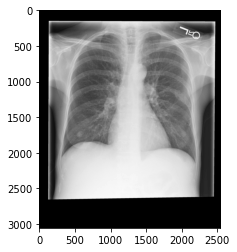

1 - /content/drive/My Drive/Dataset/physionet.org/image/02aa804e-bde0afdd-112c0b34-7bc16630-4e384014.jpg


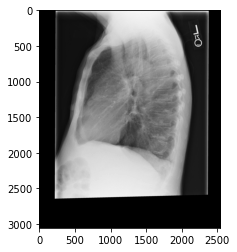

2 - /content/drive/My Drive/Dataset/physionet.org/image/174413ec-4ec4c1f7-34ea26b7-c5f994f8-79ef1962.jpg


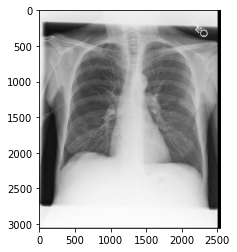

3 - /content/drive/My Drive/Dataset/physionet.org/image/2a2277a9-b0ded155-c0de8eb9-c124d10e-82c5caab.jpg


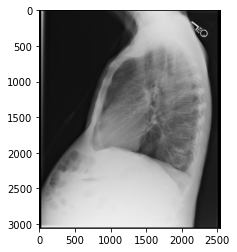

4 - /content/drive/My Drive/Dataset/physionet.org/image/e084de3b-be89b11e-20fe3f9f-9c8d8dfe-4cfd202c.jpg


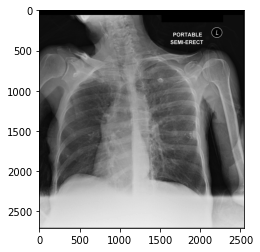

5 - /content/drive/My Drive/Dataset/physionet.org/image/68b5c4b1-227d0485-9cc38c3f-7b84ab51-4b472714.jpg


In [36]:
paired_data = pd.DataFrame(columns=['image_path', 'text_content'])
sample_count = 0

for index, row in merged_head.iterrows():
    image_raw = row['path_y']
    text_file = row['path_x']

    if (not os.path.exists(image_raw)) or (not os.path.exists(text_file)):
        print('file not exist.')
        continue

    content = extract_finding_impression(text_file)

    # merged.loc[index,'text_content'] = content

    image_out_path = '/content/drive/My Drive/Dataset/physionet.org/image/' + image_raw.split('/')[-1].split('.')[0] + '.jpg'
    ds = pydicom.read_file(image_raw) 
    img = ds.pixel_array 
    plt.imshow(img,  cmap='gray')
    plt.show()
    cv2.imwrite(image_out_path,img)

    paired_data = paired_data.append({'image_path':image_out_path, 'text_content':content},ignore_index=True)

    sample_count += 1
    if sample_count > 10000:
        break
    print(str(sample_count)+' - '+image_out_path)

        

In [34]:
img

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint16)

In [18]:
!cd /content/drive/My Drive/Dataset/physionet.org/files/mimic-cxr/2.0.0/image

/bin/bash: line 0: cd: too many arguments


In [29]:
paired_data

,image_path,text_content
0,image/02aa804e-bde0afdd-112c0b34-7bc16630-4e38...,"There is no focal consolidation, pleural eff..."
1,image/174413ec-4ec4c1f7-34ea26b7-c5f994f8-79ef...,"There is no focal consolidation, pleural eff..."
2,image/2a2277a9-b0ded155-c0de8eb9-c124d10e-82c5...,"The cardiac, mediastinal and hilar contours ..."
3,image/e084de3b-be89b11e-20fe3f9f-9c8d8dfe-4cfd...,"The cardiac, mediastinal and hilar contours ..."
4,image/68b5c4b1-227d0485-9cc38c3f-7b84ab51-4b47...,Single frontal view of the chest provided. ...
5,image/fffabebf-74fd3a1f-673b6b41-96ec0ac9-2ab6...,Single frontal view of the chest provided. ...
6,image/ea030e7a-2e3b1346-bc518786-7a8fd698-f673...,"The lungs are clear of focal consolidation, ..."


In [ ]:
paired_data.to_csv('image_path_text.csv')